# SIMULATION OF NLOS-VLC SYSTEM USING THE ROLLING SHUTTER MECHANISM

### Import the transmitter, surface and camera objects, as well as numpy library.

In [1]:
#Import module Transmitter
from transmitter import Transmitter as Transmitter

from surface import Surface as Surface

from camera import Camera as Camera

from rollingshutter import RollingShutter as RS

import numpy as np


### The trasmitter is defined as a Trasmitter type object from nine input parameters


In [2]:

transmitter = Transmitter(
        "Led1",
        position=[3, 4, 6],
        normal=[0, 1, -1],
        mlambert=1,
        wavelengths=[620, 530, 475],
        fwhm=[20, 30, 20],
        modulation='ieee16',
        frequency=2000,
        no_symbols=100,
        luminous_flux=5000
    )
print(transmitter)


 List of parameters for LED transmitter: 
Name: Led1
Position [x y z]: [3.0000e+00 4.0000e+00 6.0000e+00] 
Normal Vector [x y z]: [0.0000e+00 1.0000e+00 -1.0000e+00] 
Lambert Number: 1.0 
Central Wavelengths [nm]: [6.2000e+02 5.3000e+02 4.7500e+02] 
FWHM [nm]: [2.0000e+01 3.0000e+01 2.0000e+01]
Luminous Flux [lm]: 5000.0
ILER [W/lm]: 
 [[3.8001e-03 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.8197e-03 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.1960e-02]] 
Average Power per Channel Color: 
 [6.3336e+00 3.0328e+00 1.9934e+01] 
Total Power emmited by the Transmitter [W]: 
 29.300327676935847 



### The surface is defined from eight imputs parametes

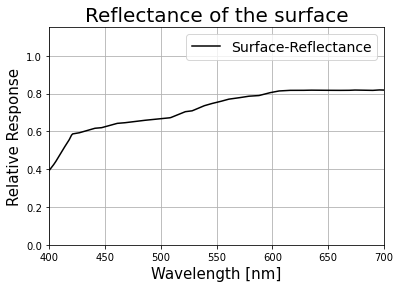

In [6]:
surface = Surface(
    name="surfacePlaster",
    position=[3, 4, 2],
    reflectance='plaster',
    vertex1=[-1, 0, -1],
    vertex2=[1, 0, -1],
    vertex3=[1, 0, 1],
    vertex4=[-1, 0, 1]
    )
surface.plot_reflectance()
surface._group_vertices()

print(surface._vertices)


### The camera is defined from a set of 13 input parameters

Projecting surface onto the image plane...
Calibration matrix (K):
 [[3.0000e+00 0.0000e+00 3.0000e+00]
 [0.0000e+00 3.0000e+00 2.0000e+00]
 [0.0000e+00 0.0000e+00 1.0000e+00]]

Rotation matrix (R):
 [[1.0000e+00 -0.0000e+00 0.0000e+00]
 [-0.0000e+00 -0.0000e+00 1.0000e+00]
 [-0.0000e+00 -1.0000e+00 -0.0000e+00]]

Projection matrix (P):
 [[3.0000e+00 3.0000e+00 -0.0000e+00 -1.2000e+01]
 [-0.0000e+00 2.0000e+00 -3.0000e+00 4.0000e+00]
 [0.0000e+00 1.0000e+00 -0.0000e+00 -1.0000e+00]]


/home/juanpc/python_phd/rs-vlc-model/./camera-models/camera_models/_frame.py:32: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection="3d")
/home/juanpc/python_phd/rs-vlc-model/./camera-models/camera_models/_principal_axis.py:27: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(proj

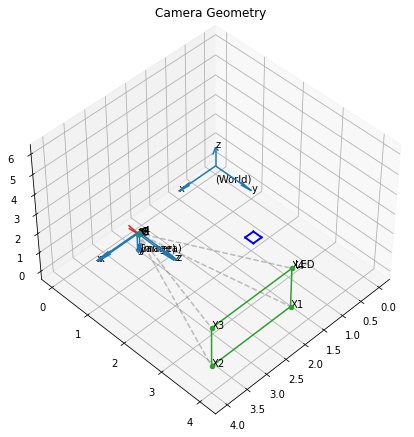

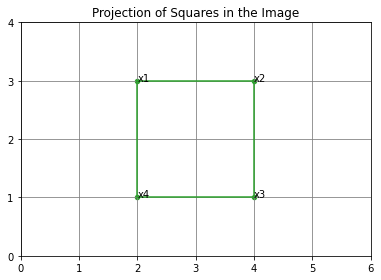

Computing the point's coordinates inside of the projected polygon ...


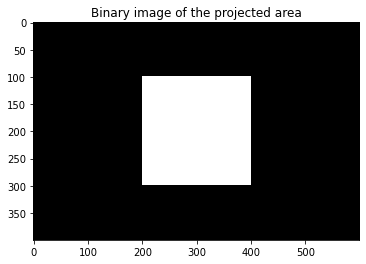

Computing the intersection points with the surface ... 
Computing the irradiance in each pixel ...


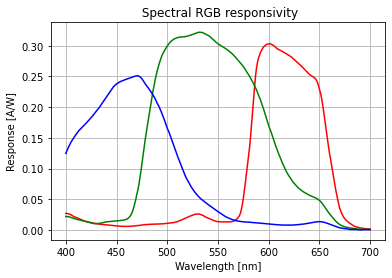

Computing crosstalk ... 
Crosstalk matrix:
 [[2.9182e-04 8.5387e-06 2.0425e-05]
 [9.7789e-05 1.3620e-04 3.1301e-04]
 [8.7657e-06 2.8187e-05 6.1458e-04]]


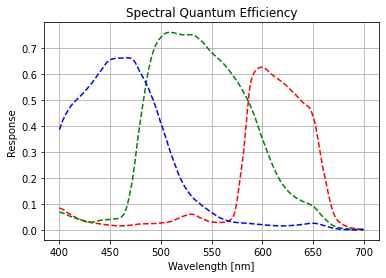

Adding blur effect ...


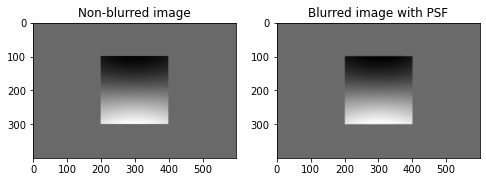

In [7]:
MX = 1e2  # number of pixels per unit distance in image coordinates in x direction
MY = 1e2  # number of pixels per unit distance in image coordinates in y direction
FOCAL_LENGTH = 3/MX  # focal length
PX= 3/MX  # principal point x-coordinate
PY= 2/MY  # principal point y-coordinate
THETA_X = np.pi / 2.0  # roll angle
THETA_Y = np.pi  # pitch angle
THETA_Z = np.pi  # yaw angle
C = np.array([3, 1, 2])  # camera centre
IMAGE_HEIGTH = 4
IMAGE_WIDTH = 6

camera = Camera(
    name="camera1",
    focal_length=FOCAL_LENGTH,
    px=PX,
    py=PY,
    mx=MX,
    my=MY,
    theta_x=THETA_X,
    theta_y=THETA_Y,
    theta_z=THETA_Z,
    centre=C,
    image_height=IMAGE_HEIGTH,
    image_width=IMAGE_WIDTH,    
    surface=surface,
    transmitter=transmitter,
    sensor='SonyStarvisBSI'
)
# camera.plot_power_image()        
camera.plot_quantum_efficiency()
camera.add_blur(size=7, center=3.5, sigma=1.0)
camera.plot_blurred_image()

### The Rolling Shutter module is added.

Row bins:
[  0  25  51  78 104 130 157 183 210 236 263 289 316 342 369 395 400]


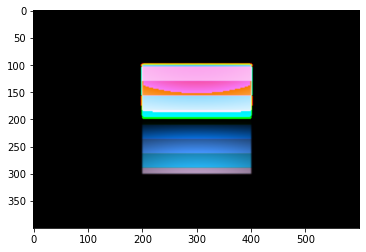

In [8]:
rollingshutter = RS(
    name="rs",
    t_exposure=85e-6,
    t_rowdelay=18.904e-6,
    t_start=0,
    iso=200,
    transmitter=transmitter,
    camera=camera
)
rollingshutter.plot_color_image()

# rollingshutter.plot_current_image()


